 # Y.Afisha : Optimizacion de gastos de marketing

# Contenido

1. [Descripción del análisis](#Descripción-del-análisis)

2. [Descripción de los datos](#Descripción-de-los-datos)
    
    2.1. [Corrección de datos](#Corrección-de-datos)
        
      2.1.1 [Visitas](#Visitas)
        
      2.1.2 [Pedidos](#Pedidos)
        
      2.1.3 [Costos](#Costos)
    

3. [Análisis de datos](#Análisis-de-datos)
    
    3.1 [Análisis de las visitas](#Análisis-de-las-visitas)
    
    3.2 [Análisis de ventas](#Análisis-de-ventas)
    
    3.3 [Análisis de marketing](#Análisis-de-marketing)
    

5. [Conclusiones](#Conclusiones)

## Descripción del análisis
<a id="Descripción del análisis"></a>

En este análisis a Y.Afisha se observarán las métricas de la aplicación, tales como la información que nos proporciona las visitas que realizan los usuarios por mes, semanas y por días, las sesiones que se inician por día y cuál es su duración, además se analizará la frecuencia con la que los usuarios regresan a utilizar la aplicación.
De igual manera se analizar las ventas que realiza la aplicación, las primeras ventas que se realizan, las ventas que se realizan de manera mensual, se investigara el tamaño promedio de compra y el dinero en promedio que gasta cada usuario.
Para marketing se analizará el total de dinero gastado en marketing, cual es el costo por la adquisición por cliente y la rentabilidad de las inversiones.
Todo este análisis se realiza con el objetivo de proporcionar a los expertos en marketing de Y.Afisha a realizar inversiones efectivas en marketing. 

## Descripción de los datos
<a id="Descripción de los datos"></a>

In [1]:
# Carga de las librerías
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from scipy import stats
import warnings

# Set the color palette
cmap = sns.light_palette("seagreen", as_cmap=True)

pd.set_option('display.max_columns', None)

In [2]:
# Carga de datos
df_visits = pd.read_csv("/datasets/visits_log_us.csv")
df_orders = pd.read_csv("/datasets/orders_log_us.csv")
df_costs = pd.read_csv("/datasets/costs_us.csv")

In [3]:
# Vista general de los datos visits
df_visits.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [4]:
# Vista general de las primeras 10 filas 
print(df_visits.head(10))

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
5  desktop  2017-09-03 21:36:00          5  2017-09-03 21:35:00   
6  desktop  2018-01-30 12:09:00          1  2018-01-30 11:13:00   
7    touch  2017-11-05 15:15:00          3  2017-11-05 15:14:00   
8  desktop  2017-07-19 10:44:00          3  2017-07-19 10:41:00   
9  desktop  2017-11-08 13:43:00          5  2017-11-08 13:42:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
5  16007536194108375387  
6   6661610529277171451  
7  11423865690854540312  
8   2987360259350925644  
9 

Como podemos observar contamos con 359400 filas, no se observan valores ausentes, y contiene 5 columnas, las cuales nos muestran el identificador único del usuario, el dispositivo del usuario, la fecha y hora de inicio de la sesión, la fecha y hora de término de la sesión y el identificador de la fuente de anuncios de la que proviene el usuario.

In [5]:
# Vista general de los datos orders
df_orders.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [6]:
# Vista general de las primeras 10 filas
print(df_orders.head(10))

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
5  2017-06-01 08:43:00     0.18  10402394430196413321
6  2017-06-01 08:54:00     1.83  12464626743129688638
7  2017-06-01 09:22:00     1.22   3644482766749211722
8  2017-06-01 09:22:00     3.30  17542070709969841479
9  2017-06-01 09:23:00     0.37   1074355127080856382


Contamos con 54, 415 filas, a simple vista no se observan valores ausentes y contiene 3 columnas las cuales nos muestran el identificador único del usuario que realiza un pedido, la fecha y hora del pedido y el ingresos de Y.Afisha de este pedido.

In [7]:
# Vista general de los datos costs
df_costs.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [8]:
# Vista geral de las primeras 10 filas
print(df_costs.head(10))

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
5          1  2017-06-06  40.39
6          1  2017-06-07  40.59
7          1  2017-06-08  56.63
8          1  2017-06-09  40.16
9          1  2017-06-10  43.24


A simple vista podemos observar cuenta con 2,542 filas, no se observan valores ausentes y contiene 3 columnas que contienen el identificador de la fuente de anuncios, la fecha y los gastos en esta fuente de anuncios en este día.

### Corrección de datos
<a id="Corrección de datos"></a>

#### Visitas
<a id="Visitas"></a>

In [9]:
# Cambio de los nombres de las columnas a minúsculas de visits
df_visits.columns = df_visits.columns.str.lower()

In [10]:
# Remplazamos los espacios vacíos 
df_visits.columns = df_visits.columns.str.replace(' ', '_')

In [11]:
# Comprobamos que los cambias se realizaron de manera correcta
df_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [12]:
# Comprobamos la existencia de filas duplicadas
print(df_visits.duplicated().sum())

0


In [13]:
# Converimos las columnas end_ts y start_ts a datetime
df_visits["end_ts"] =  pd.to_datetime(df_visits["end_ts"], format="%Y-%m-%d %H:%M:%S")
df_visits["start_ts"] =  pd.to_datetime(df_visits["start_ts"], format="%Y-%m-%d %H:%M:%S")

In [14]:
# Buscamos la cantidad de valores unicos en la columna device
df_visits["device"].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [15]:
# Cambiamos el tipo de datos de la columna device
df_visits["device"] = df_visits["device"].astype("category")

In [16]:
# Comprobamos el tipo de datos
print(df_visits["end_ts"].dtype)
print(df_visits["start_ts"].dtype)
print(df_visits["device"].dtype)

datetime64[ns]
datetime64[ns]
category


Para esta corrección primero pasamos los nombres de las columnas a minúsculas y agregamos un _ en los espacios vacíos, comprobamos la presencia de duplicados, se realizó un cambio en el tipo de las columnas start_ts y end_ts para que sea de tipo datetime y también cambiamos el tipo de la columna device a tipo category.

#### Pedidos
<a id="Pedidos"></a>

In [17]:
# Cambio de los nombres de las columnas a minúsculas de orders
df_orders.columns = df_orders.columns.str.lower()

In [18]:
# Remplazamos los espacios vacíos 
df_orders.columns = df_orders.columns.str.replace(' ', '_')

In [19]:
# Comprobamos que los cambias se realizaron de manera correcta
df_orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [20]:
# Comprobamos la existencia de filas duplicadas
print(df_orders.duplicated().sum())

0


In [21]:
# Converimos la columna buy_ts a datetime
df_orders["buy_ts"] =  pd.to_datetime(df_orders["buy_ts"], format="%Y-%m-%d %H:%M:%S")

In [22]:
# Comprobamos el tipo de datos
print(df_orders["buy_ts"].dtype)

datetime64[ns]


Primero se realizo un cambio en los nombres de las columnas para que todas esten en minúscula y llenamos los espacios vacios, se comprovo la existencia de valores duplicados y se realizo un cambio de tipo en la columna buy_ts para que sea de tipo datetime.

#### Costos
<a id="Costos"></a>

In [23]:
# Convertimos la columna dt a datetime
df_costs["dt"] =  pd.to_datetime(df_costs["dt"], format="%Y-%m-%d")

In [24]:
# Comprobamos el tipo de datos
print(df_costs["dt"].dtype)

datetime64[ns]


In [25]:
# Comprobamos la existencia de filas duplicadas
print(df_costs.duplicated().sum())

0


In [26]:
# Cambiamos el tipo de dato
df_costs["source_id"] = df_costs["source_id"].astype("category")
print(df_costs["source_id"].dtype)

category


En la corrección se realizó el cambio de tipo de datos a la columna dt para que sea de tipo datetime y se revisó la existencia de duplicados.

## Análisis de datos
<a id="Análisis de datos"></a>

### Análisis de las visitas
<a id="Análisis de las visitas"></a>

In [27]:
# Agregamos la columna de la duración de la sesión
df_visits["session_duration"] = (df_visits["end_ts"] - df_visits["start_ts"]).dt.total_seconds() / 60
# Agregamos columnas de fecha
df_visits["date"] = df_visits["start_ts"].dt.date
df_visits["week"] = df_visits["start_ts"].dt.to_period("W")
df_visits["month"] = df_visits["start_ts"].dt.to_period("M")

In [28]:
# Buscamos los usuarios por mes
users_per_month = df_visits.groupby("month")["uid"].nunique()
print(users_per_month.head())

month
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Freq: M, Name: uid, dtype: int64


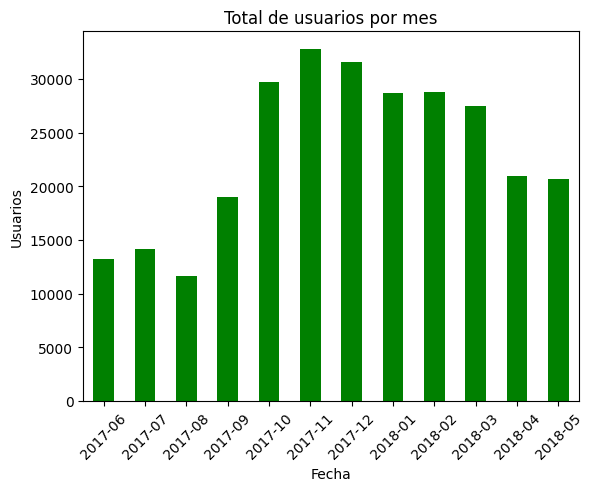

In [29]:
users_per_month.plot(kind="bar",
                    x="start_ts",
                    xlabel="Fecha",
                    ylabel="Usuarios",
                    title="Total de usuarios por mes",
                    color="green")

plt.xticks(rotation=45)
plt.show()

El mes con más usuarios es noviembre de 2017 con 32,797 usuarios, seguido por el mes de diciembre de 2017, entre el mas de octubre de 2017 hasta el mes de marzo de 2017 se encuentran los meses en que más se usó la aplicación. Los meses de junio, julio y agosto de 2017 fueron en los que menos se usó la aplicación.

In [30]:
# Buscamos los usuarios por semana
users_per_week = df_visits.groupby("week")["uid"].nunique().sort_values(ascending=False)
print(users_per_week.head())

week
2017-11-20/2017-11-26    10586
2017-12-04/2017-12-10     8407
2017-12-11/2017-12-17     8214
2017-11-27/2017-12-03     8166
2017-11-13/2017-11-19     8117
Freq: W-SUN, Name: uid, dtype: int64


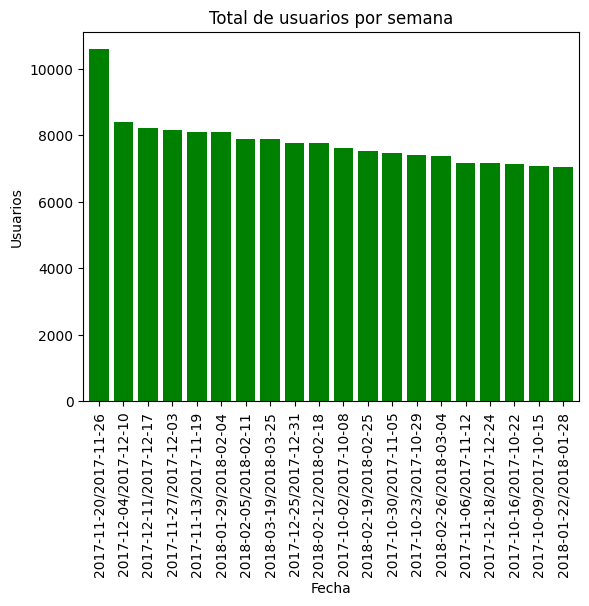

In [31]:
users_per_week.head(20).plot(kind="bar",
                             x="start_ts",
                             xlabel="Fecha",
                             ylabel="Usuarios",
                             title="Total de usuarios por semana",
                             color="green",
                             width=0.8)

plt.show()

La semana con más usuarios utilizándola aplicación fue del 20 de noviembre de 2017 al 26 de noviembre de 2017 con 10,586 usuarios, entre las semana que empieza el 25 de septiembre de 2017 hasta el 25 de marzo de 2018 se encentra la mayor concentración de usuarios que utilizan la aplicación. Siendo un total de 26 semanas con inicio de sesiones considerables en comparacion con los demás meses.

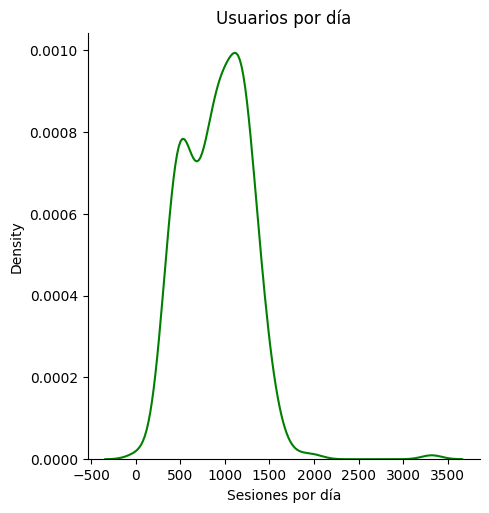

In [32]:
# Buscamos los usuarios por día
users_per_day = df_visits.groupby("date")["uid"].nunique()
# Grafico
sns.displot(users_per_day, kind='kde', color="green")
plt.xlabel("Sesiones por día")
plt.title("Usuarios por día")
plt.show()

In [33]:
# Promedio de los usuarios por día
print("Promedio de usuarios por día", users_per_day.mean())

Promedio de usuarios por día 907.9917582417582


La fecha que más destaca con 3,319 usuarios iniciando sesión el 24 de noviembre de 2017, otros días en los que se usó más la aplicación son 31 de mayo, el 01 de febrero, del 25 al 27 de marzo, todas estas fechas del 2018 y del 2017 fueron el 17, 25 y 27 de noviembre y el 07 de diciembre. En promedio por día la aplicación es usada por 908 usuarios. A fecha que más destaca con 3,319 usuarios iniciando sesión el 24 de noviembre de 2017, otros días en los que se usó más la aplicación son 31 de mayo, el 01 de febrero, del 25 al 27 de marzo, todas estas fechas del 2018 y del 2017 fueron el 17, 25 y 27 de noviembre y el 07 de diciembre. En promedio por día la aplicación es usada por 908 usuarios. 

In [34]:
# Calculamos la duración de las sesiones
average_session_duration = df_visits["session_duration"].mean()
print("Promedio de la duración de las sesiones", average_session_duration)

Promedio de la duración de las sesiones 10.717094787608978


En promedio las duraciones de las sesiones no son tan extendidas ya que estas no llegan a durar un día completo, la sesiones duran en promedio 10 horas. 

<AxesSubplot:title={'center':'Cohortes: retención de usuarios/as'}, xlabel='cohort_lifetime', ylabel='first_activity_month'>

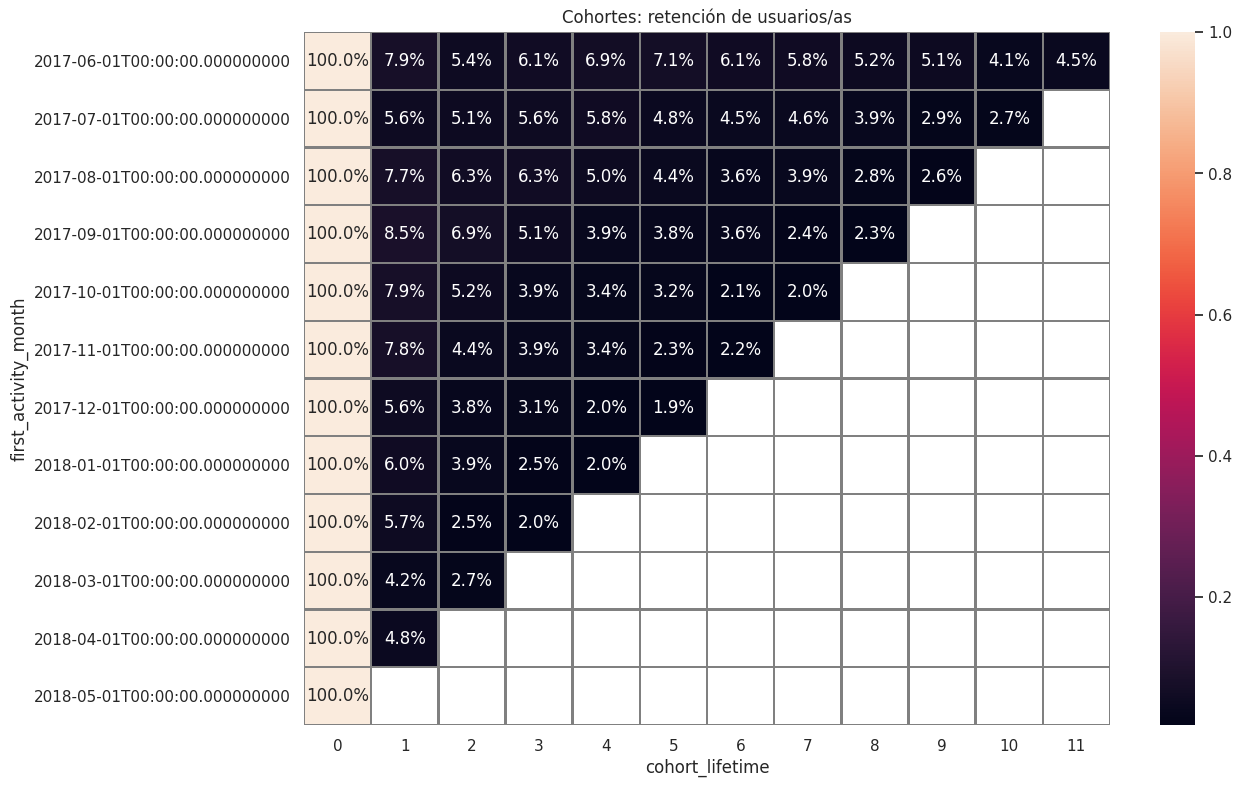

In [35]:
# Calculamos la frecuencia de retorno de los usuarios

# Primera fecha de actividad para cada usuario
first_activity_date = df_visits.groupby(["uid"])["start_ts"].min()
first_activity_date.name = "first_activity_date"
df_visits = df_visits.join(first_activity_date, on="uid",  rsuffix='_new')
# Primer día del mes para la columna start_ts
df_visits["activity_month"] = pd.to_datetime(
    df_visits["start_ts"]
).dt.to_period("M").dt.to_timestamp()
# Primer día del mes para la primera actividad del usuario
df_visits["first_activity_month"] = pd.to_datetime(
    df_visits["first_activity_date"]
).dt.to_period("M").dt.to_timestamp()

# Cohorte en meses
df_visits["cohort_lifetime"] = (
    (df_visits["activity_month"].dt.year - df_visits["first_activity_month"].dt.year) * 12 +
    (df_visits["activity_month"].dt.month - df_visits["first_activity_month"].dt.month)
)

cohorts = (
    df_visits.groupby(["first_activity_month", "cohort_lifetime"])
    .agg({"uid": "nunique"})
    .reset_index()
)

# Contar el número de usuarios en el primer mes de la cohorte
initial_users_count = cohorts[cohorts["cohort_lifetime"] == 0][
    ["first_activity_month", "uid"]
]
initial_users_count = initial_users_count.rename(
    columns={"uid": "cohort_users"}
)
cohorts = cohorts.merge(initial_users_count, on="first_activity_month")
cohorts["retention"] = cohorts["uid"] / cohorts["cohort_users"]

# Tabla pivote para visualizar la retención por cohortes
retention_pivot = cohorts.pivot_table(
    index="first_activity_month",
    columns="cohort_lifetime",
    values="retention",
    aggfunc="sum",
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: retención de usuarios/as')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'
)

Se puede observar una tendencia de disminución de la retención a medida que pasa el tiempo,  las cohortes de junio y julio de 2017, tienen una retención inicial del 100% en el primer mes. Sin embargo, la tasa disminuye en los meses siguientes, pero algunas cohortes como la de junio de 2017 mantienen una retención notable a lo largo del tiempo, con un 4.49% de usuarios todavía activos 11 meses después, en comparación con las demás cohortes. 

### Análisis de ventas
<a id="Análisis de ventas"></a>

In [36]:
# Buscamos el momento en que empiezan a comprar
# Primera orden
df_orders = df_orders.assign(dt_1st_purchase=df_orders.groupby("uid")["buy_ts"].transform("min"))

# Calculamos el tiempo que ha psado desde la primera orden (horas)
df_orders["time_passed"] = df_orders["buy_ts"] - df_orders["dt_1st_purchase"]
df_orders["time_passed"] /= np.timedelta64(1, "h")  

# Primera orden del mes 
df_orders["first_order_month"] = df_orders["dt_1st_purchase"].dt.to_period("M").dt.start_time
df_orders.sample(4)

,buy_ts,revenue,uid,dt_1st_purchase,time_passed,first_order_month
4503,2017-07-27 18:23:00,5.83,13179811585191988629,2017-07-27 17:41:00,0.70,2017-07-01
10760,2017-10-05 11:02:00,0.55,988595348971648857,2017-10-05 11:02:00,0.00,2017-10-01
44114,2018-04-14 18:57:00,4.89,3528944017876285190,2018-04-14 18:57:00,0.00,2018-04-01
38241,2018-03-05 10:27:00,4.03,13861787462523859202,2017-12-14 18:36:00,1935.85,2017-12-01


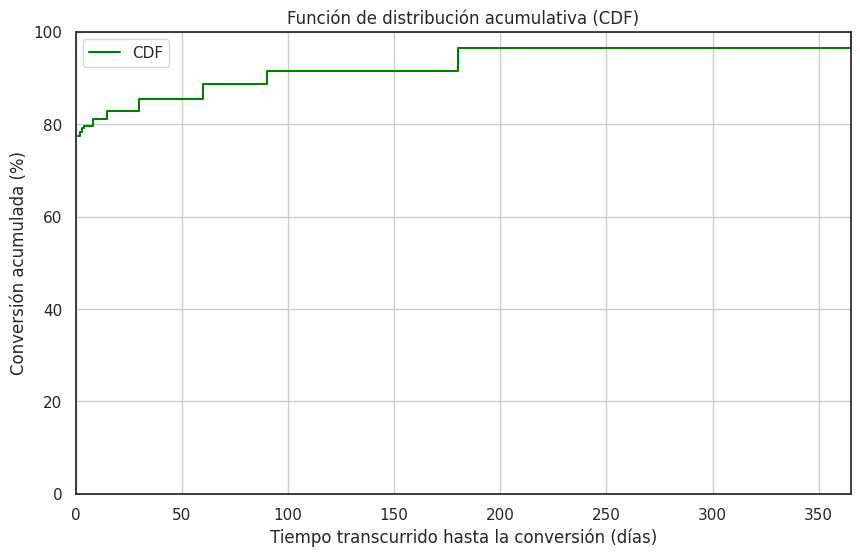

{'Conversion 1d': 77,
 'Conversion 2d': 78,
 'Conversion 3d': 79,
 'Conversion 4d': 80,
 'Conversion 8d': 81,
 'Conversion 15d': 83,
 'Conversion 30d': 85,
 'Conversion 60d': 89,
 'Conversion 90d': 91,
 'Conversion 180d': 96,
 'Conversion 365d': 100}

In [37]:
# Definimos los días y calculamos las horas
ndays = np.array([  1.,   2.,   3.,   4.,   8.,  15.,  30.,  60.,  90., 180., 365.])
time_intervals = 24 * ndays

# Calculamos el porcentaje de conversión acumulada
cumulative_conversion = (np.searchsorted(np.sort(df_orders["time_passed"]), time_intervals) / len(df_orders)) * 100

# Graficamos Función de distribución acumulativa (CDF)
plt.figure(figsize=(10, 6))
plt.step(ndays, cumulative_conversion, where="post", label="CDF", color="green")
plt.xlabel("Tiempo transcurrido hasta la conversión (días)")
plt.ylabel("Conversión acumulada (%)")
plt.title("Función de distribución acumulativa (CDF)")
plt.grid(True)

plt.xlim(0, ndays.max())
plt.ylim(0, 100)
plt.legend()
plt.show()

# Diccionario de conversión
conversion_dict = {f"Conversion {int(day)}d": round(conv) for day, conv in zip(ndays, cumulative_conversion)}
conversion_dict

In [38]:
# Promedio de ventas
orders_per_user = df_orders.groupby("uid").agg({"buy_ts": "count"}).reset_index()
print("Promedio de ventas", orders_per_user["buy_ts"].mean())

Promedio de ventas 1.3803630588943954


Entre los 0 y 50 días, hay un rápido crecimiento en el porcentaje de conversiones acumuladas, lo que indica que un número considerable de conversiones se produce en los primeros días. Después de los 50 días, el crecimiento es más lento, con algunos saltos hasta los 250 días, lo que sugiere que las conversiones se estabilizan y pocas ocurren después de ese tiempo.
Más allá de 250, la curva parece haberse aplanado, alcanzando casi el 100%, lo que indica que casi todas las conversiones ya han ocurrido. En promedio por usuario se realiza entre 1 o 2 ventas si se rondondea.  

In [39]:
# Pedidos que se hacen por un cierto periodo (mes, semana, día)
#Creamos columnas para días, semanas y meses
df_orders["day"] = df_orders["buy_ts"].dt.to_period("D").dt.start_time
df_orders["week"] = df_orders["buy_ts"].dt.to_period("W").dt.start_time
df_orders["month"] = df_orders["buy_ts"].dt.to_period("M").dt.start_time

avg_orders = {
    "day": df_orders.groupby("day").size().mean(),
    "week": df_orders.groupby("week").size().mean(),
    "month": df_orders.groupby("month").size().mean()
}

print(f"{avg_orders['day']:.1f}\t pedidos al día")
print(f"{avg_orders['week']:.1f}\t pedidos a la semana")
print(f"{avg_orders['month']:.1f}\t pedidos al mes")

138.5	 pedidos al día
951.2	 pedidos a la semana
3878.1	 pedidos al mes


Al día se realizan 138 pedidos, 951 pedidos a la semana y 3878 pedidos por mes, las cantidades de pedidos pueden variar, asi que estas cantidades son un promedio.

In [40]:
# Tamaño promedio de las compras
avg_order_value = df_orders.groupby("uid")["revenue"].sum().reset_index()
print("Promedio de compras realizadas por usuario", avg_order_value["revenue"].mean())

Promedio de compras realizadas por usuario 6.901327930345262


El promedio de compra que se realiza en la aplicación es de 6.90 dólares a lo largo del periodo 06/2017 - 06/2018.

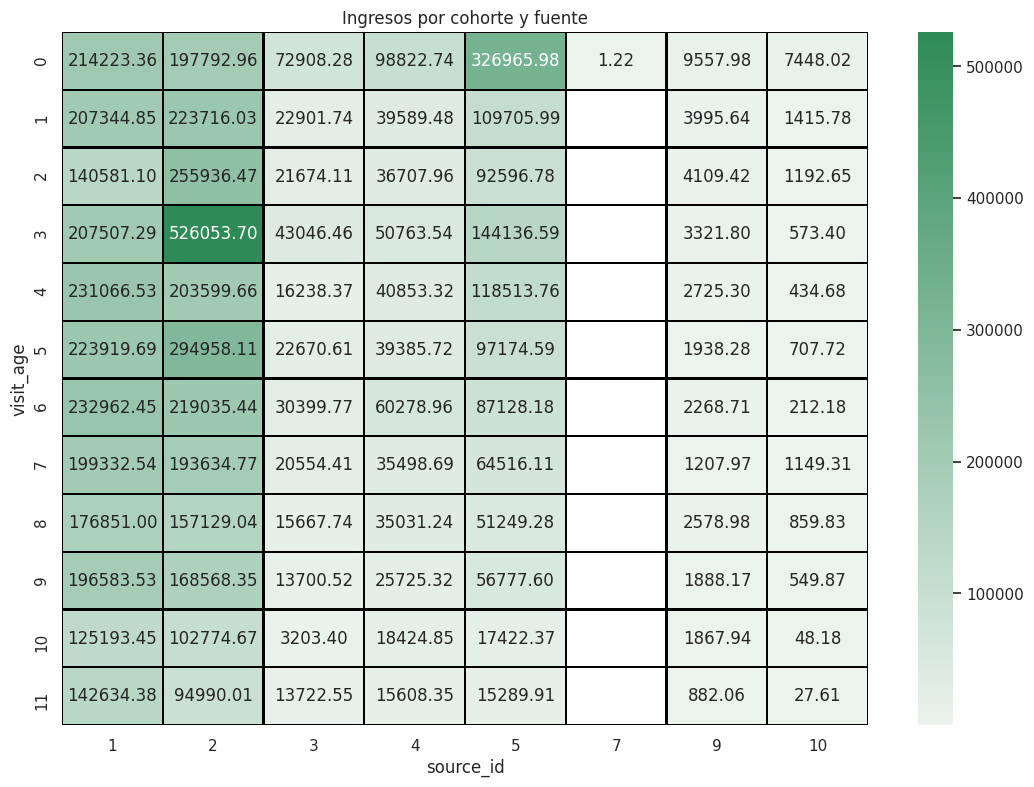

In [52]:
# Buscamos los ingresos por cohorte y por fuente
#agregamos una nueva columna para considerar la "edad" de los usuarios con respecto al mes de su primer visita
df_visits["visit_age"] =(df_visits["month"].dt.month - df_visits["first_activity_month"].dt.month)
#para evitar tener valores enteros, agregamos el factor años
df_visits["visit_age"] += 12*(df_visits["month"].dt.year - df_visits["first_activity_month"].dt.year)
# Unimos  df_orders con df_visits 
df_orders = df_orders.merge(df_visits[["uid", "source_id", "visit_age"]], on="uid", how="left")

# Calculamos el total revenue 
source_cohort_income = df_orders.groupby(["visit_age", "source_id"])["revenue"].sum().reset_index()
source_cohort_income.columns = ["visit_age", "source_id", "total_revenue"]

# Creamos una tabla
data = source_cohort_income.pivot_table(
    index="visit_age",
    columns="source_id",
    values="total_revenue",
    aggfunc="sum"
)

# Agregamos un mapa de color
plt.figure(figsize=(13, 9))
sns.heatmap(data, annot=True, fmt='.2f',
    linewidths=1,
    linecolor='black',cmap=cmap)
plt.title('Ingresos por cohorte y fuente')
plt.show()

La fuente 5 tiene uno de los valores más altos de LTV en múltiples cohortes, podríamos decir que es una fuente efectiva para generar ingresos. Las cohortes más antiguas tienen los valores más altos que las cohortes más recientes, esto podria ser debido a que ya han tenido más tiempo para generar ingresos. Algunas fuentes como fuente 9 y fuente 10 generan ingresos mucho más bajos en comparación con otras fuentes, independientemente de la antigüedad de la cohorte, lo que sugiere que estas fuentes no son tan efectivas.

In [53]:
# Calculamos el numero de usuarios
users = df_orders.groupby(["visit_age", "source_id"])["uid"].nunique().reset_index()
users.columns = ["visit_age", "source_id", "unique_users"]

# Visualizamos el numero de usuarios por fuente y por cohorte
users_pivot = users.pivot_table(
    index="visit_age",
    columns="source_id",
    values="unique_users",
    aggfunc="sum")

# Debido a que no tenemos especificado un margen de beneficio, continuamos con el cálculo  del LTV
LVT = data / users_pivot  # LTV = Ingresos / numero de usuarios

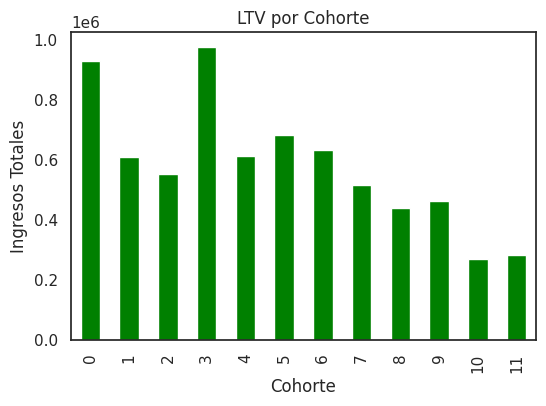

In [55]:
# Graficar LTV por Cohorte
plt.figure(figsize=(6, 4))
data.sum(axis=1).plot(kind="bar", color="green")

plt.title("LTV por Cohorte")
plt.xlabel("Cohorte")
plt.ylabel("Ingresos Totales")
plt.show()

Podemos resaltar que las cohortes más recientes 10 y 11 generan considerablemente menos ingresos, en comparación con las cohortes 3, 0, 4 y 5 parecen ser las más valiosas en términos de ingresos, lo que significa que las estrategias de adquisición o retención implementadas en esos periodos fueron más efectivas.

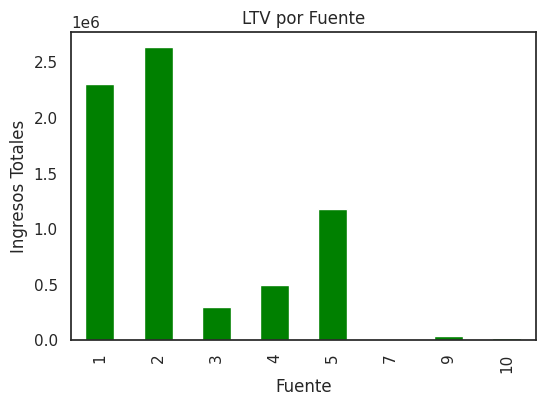

In [56]:
# Graficar LTV por Fuente
plt.figure(figsize=(6, 4))
data.sum(axis=0).plot(kind="bar", color="green")
plt.title("LTV por Fuente")
plt.xlabel("Fuente")
plt.ylabel("Ingresos Totales")
plt.show()

El LTV que destaca más es el de la fuente 1 y 2, esto nos dice que debemos prestar atención a estas fuentes por su mayor rendimieno en comparación con las demas fuentes, la fuente 10 es la que tiene un menor valor de LTV. 

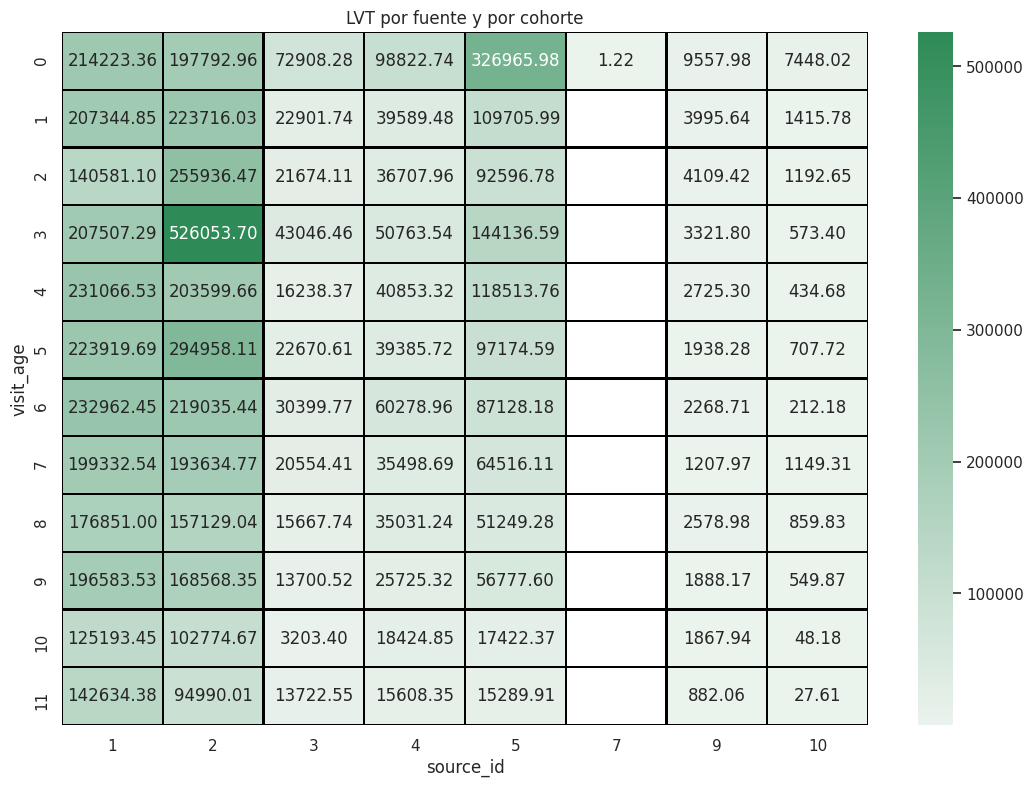

In [57]:
#Agregamos un mapa de calor
plt.figure(figsize=(13, 9))
sns.heatmap(data, annot=True, fmt='.2f',
    linewidths=1,
    linecolor='black',cmap=cmap)
plt.title('LVT por fuente y por cohorte')
plt.show()

Como podemos observarla fuente 5 tiene uno de los valores más altos de LTV en múltiples cohortes, lo que podría indicar que es una fuente particularmente efectiva para generar ingresos. Las cohortes más antiguas tienen los valores más altos que las cohortes más recientes. Algunas fuentes como fuente 9 y fuente 10 generan ingresos mucho más bajos en comparación con otras fuentes, independientemente de la antigüedad de la cohorte, lo que sugiere que estas fuentes no son tan efectivas.

### Análisis de marketing
<a id="Análisis de marketing"></a>

El costo diario fue de: 129.48%


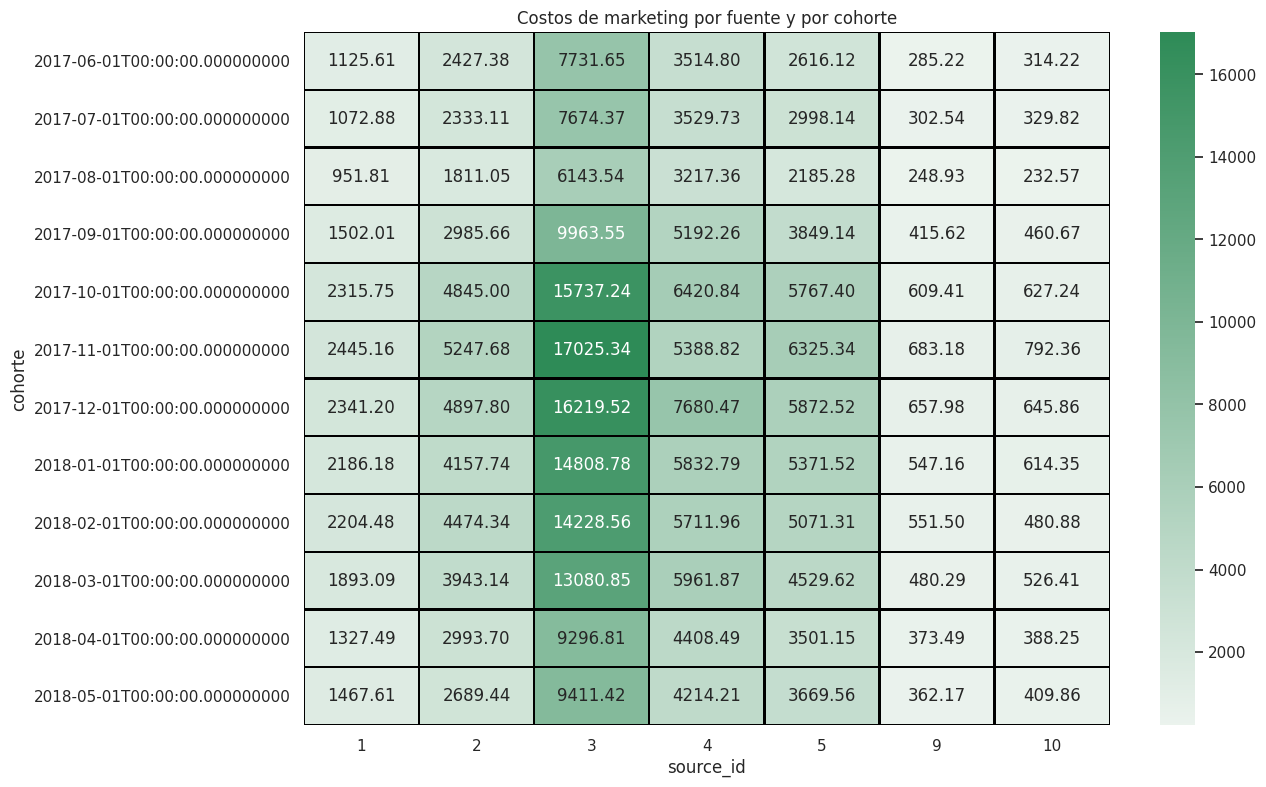

In [69]:
# Calcular los gastos totales por cohorte y fuente de anuncio
#Creamos columnas para días, semanas y meses
df_costs["day"] = df_costs["dt"].dt.to_period("D").dt.start_time
df_costs["week"] = df_costs["dt"].dt.to_period("W").dt.start_time
df_costs["month"] = df_costs['dt'].dt.to_period('M').dt.start_time

df_costs = df_costs.rename(columns={"month":"cohorte"})
costs_cohorte_fuente = pd.DataFrame(df_costs.groupby(["cohorte", "source_id"],
                                      observed=True)["costs"].sum().rename("total_cost"))

costs_cohorte_fuente_pivot = costs_cohorte_fuente.pivot_table(
    index='cohorte',
    columns='source_id',
    values='total_cost',
    aggfunc='sum')

daily_cost = (df_costs.groupby(['source_id', 'day'], observed=True)['costs'].sum())
print(f"El costo diario fue de: {daily_cost.mean():.2f}%")

#Agregamos un mapa de calor
plt.figure(figsize=(13, 9))
sns.heatmap(costs_cohorte_fuente_pivot, annot=True, fmt='.2f',
    linewidths=1,
    linecolor='black',
            cmap=cmap
            )
plt.title('Costos de marketing por fuente y por cohorte')
plt.show()

La fuente número 3 es una fuente que tiene altos costos en markeitng empezando desde octubre de 2017 hasta marzo de 2018, la fuente 9 y 10 son fuentes con menores costos a lo largo de todo el periodo, las fuentes con costos considerables son la fuente 2, 3, 4 y 5.

In [70]:
# Calculamos el CAC
# Primeras ordenes
first_orders_source = (df_visits[["uid","source_id", "first_activity_date"]]
                       .rename(columns={"source_id":"source_id",
                                        "first_activity_date":"day"}))

# Encontramos la adquisición diaria uniendo las tablas anteriores
daily_adq = (
    first_orders_source
    .groupby(['source_id', 'day'])['uid']
    .nunique()
).rename('new_users')

# Unimos los costos y el número de clientes
daily_cac = pd.merge(daily_cost, daily_adq, left_index=True, right_index=True)

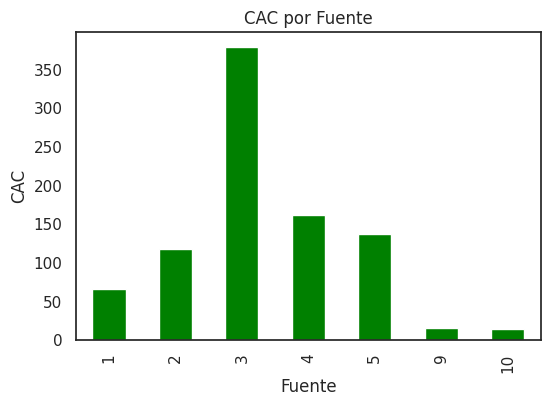

In [79]:
# Buscamos las primeras ordenes de las fuentes
first_orders_source = (df_visits[["uid","source_id", "first_activity_date"]]
                       .rename(columns={"source_id":"source_id",
                                        "first_activity_date":'day'}))

# Encontramos la adquisición diaria uniendo las tablas anteriores
daily_adq = (
    first_orders_source
    .groupby(['source_id', 'day'])['uid']
    .nunique()
).rename('new_users')

# Unimos el costo y el número de clientes
daily_cac = pd.merge(daily_cost, daily_adq, left_index=True, right_index=True)

#Calculamos el CAC por día
CAC_fuente = (daily_cac.groupby('source_id').sum()
                .assign(CAC=lambda x: x['costs'] / x['new_users'])
)
# Plot CAC
plt.figure(figsize=(6, 4))
CAC_fuente['CAC'].plot(kind='bar', color="green")
plt.title('CAC por Fuente')
plt.xlabel('Fuente')
plt.ylabel('CAC')
plt.show()

La fuente 3 es la que cuenta con el mayor costo de adquisición en comparación con las demás fuentes, tal como la fuente 10 que es la que genera menos costo de adquisición.

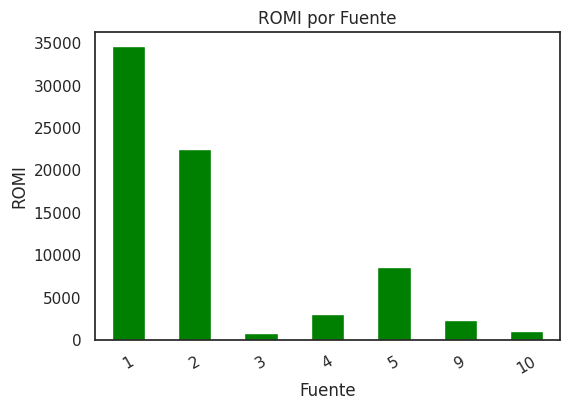

In [77]:
# Calculamos el LTV por fuente:
LTV_fuente = data.sum(axis=0).rename("LTV")

data_fuente = CAC_fuente.join(LTV_fuente)
data_fuente = data_fuente.assign(ROMI=data_fuente['LTV'] / data_fuente['CAC'])


# Graficamos el ROMI
# - Barplot
plt.figure(figsize=(6, 4))
data_fuente['ROMI'].plot(kind='bar', color="green")
plt.title('ROMI por Fuente')
plt.xlabel('Fuente')
plt.ylabel('ROMI')
plt.xticks(rotation=30)
plt.show()

La fuente de anuncios 1 cuenta con el valor más alto, lo que nos dice que esta fuente de anuncios es la mejor con la que cuenta Y.Afisha, otra de las fuentes en la que el retorno de inversión es bueno es la numero 2, en comparación con las demás la 1 y la 2 son las que cuentan con un retorno de inversión alto, podemos decir que las fuentes como las numero 3, 4, 5 y 10 el retorno de inversión no es bueno para estas fuentes. 

## Conclusiones
<a id="Conclusiones"></a>

Visitas:
- Los meses en los que la aplicación se usa más es en noviembre y diciembre de 2017.
- La semana que los usuarios utilizaron más la aplicación fue del 20 al 26 de noviembre de 2017.
- El día en que los usuarios usaron la aplicación fue el 17 de noviembre de 2017 con 3,319 usuarios, y en promedio a lo largo del periodo 908 usuarios utilizan la aplicación. 
- Normalmente los usuarios que regresan a la aplicación lo hacen en un promedio de 16 horas, y un gran porcentaje de los usuarios o están regresando.
- Las fechas en que los usuarios utilizan más la aplicación se pueden deber a que son meses en los que eventos como conciertos aumentan en comparación con los demás meses, en los que posiblemente no realicen tantas exhibiciones o proyecciones de películas, y considerando que para diciembre existen muchas fechas festivas. 

Ventas:
- El 24 de noviembre de 2017 se realizó una cantidad considerable de ventas, en promedio por día se realizan 100 ventas.
- Se realizaron 6,218 pedidos el mes de diciembre de 2017, y en promedio se realizan compras de 7 dólares. Como se observó en las visitas las mismas fechas en donde hay más visitas se han realizado más ventas en comparación con los demás meses.
- El valor de vida del cliente (LTV) dado que los valores caen rápidamente después del primer mes, se podrían analizar estrategias para mejorar la retención de clientes, como programas de fidelización, descuentos en compras recurrentes, o mejorar la experiencia del cliente. La mayoría de los usuarios realizan una sola compra y pocos continúan comprando en los meses siguientes. Mejorar la retención de clientes podría ser una clave importante para aumentar el LTV y el éxito a largo plazo de la empresa.

Marketing:
- La fuente de anuncios que más gasto en a lo largo del periodo fue el número 3 con un gasto de 141,321.63.
- El costo de adquisición de clientes/as (CAC) es superior al valor de vida del cliente (LTV), esto no es un buen indicador ya que se está gastando más por la aducción de clientes, que lo que los clientes gastan en la aplicación.
- El Retorno sobre la Inversión en Marketing (ROMI) que obtenemos nos dice que la cohorte no generó ingresos adicionales en varios meses, es importante seguir monitoreando la para ver la evolución a lo largo del tiempo. La tabla de ROMI muestra que la empresa ha logrado recuperar su inversión en algunas cohortes más antiguas, y las cohortes más recientes están en camino de hacerlo.
- Las fuentes de anuncio a considerar por su retorno de inversión es el número 1 y el número 2, que en consideración con las demás fuentes tiene un alto retorno, se podría dar más importancia a estas fuentes o realizar más inversiones en ellas, o bien cambiar alguna de las fuentes que tiene un retorno de inversión bajo por otra.
- Ya que el costo por adquirir cada cliente es más elevado se podría considerar reducir los gastos de las fuentes de anuncios o realizar un análisis para conocer cuál es la fuente que atrae a más usuarios nuevos, para así poder destinar esos costos a otra fuente que genere más resultados positivos. Otro punto importante es la fidelizar a los clientes que ya conseguimos ya que un gran porcentaje no vuelven a utilizar la aplicación, esto se podría realizar a través de descuentos especiales o mejorando su experiencia.